<a href="https://colab.research.google.com/github/CriticalBee/prueba/blob/main/DS_C3_SC1_CHRISTIAN_RAUL_VALERO_GUTIERREZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

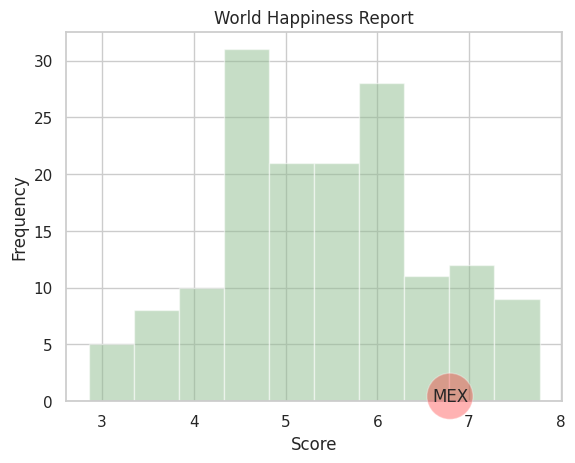

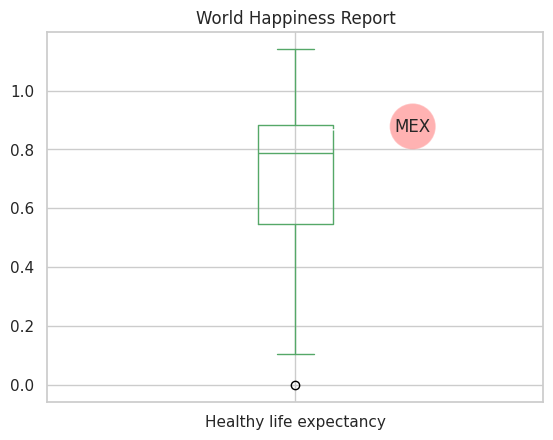

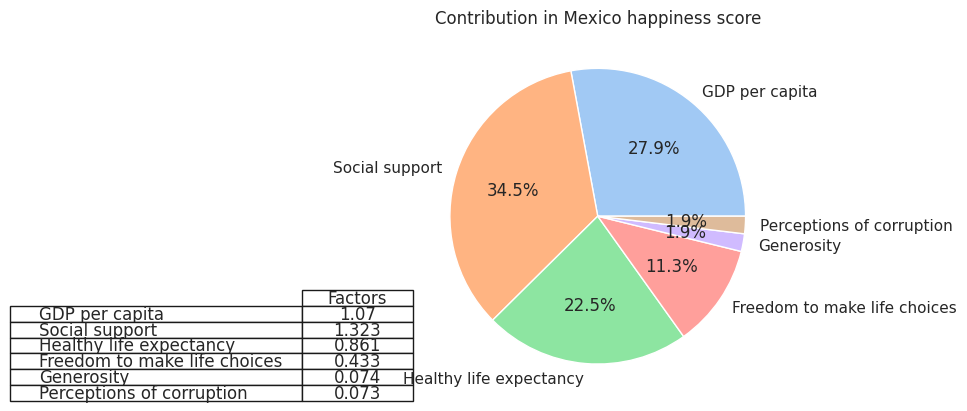

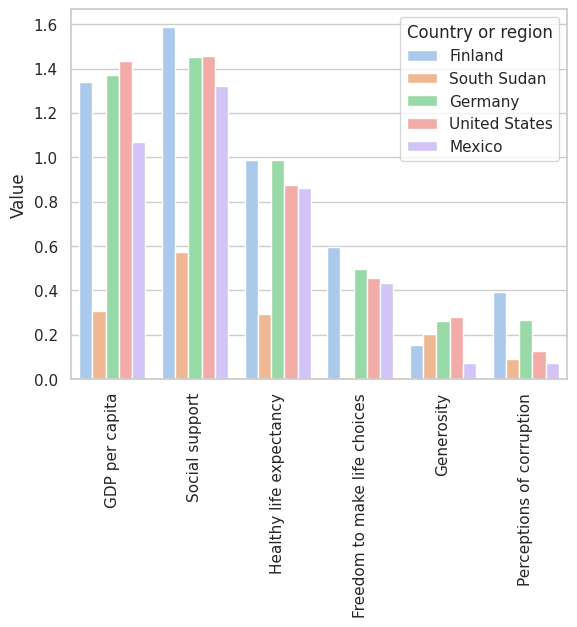

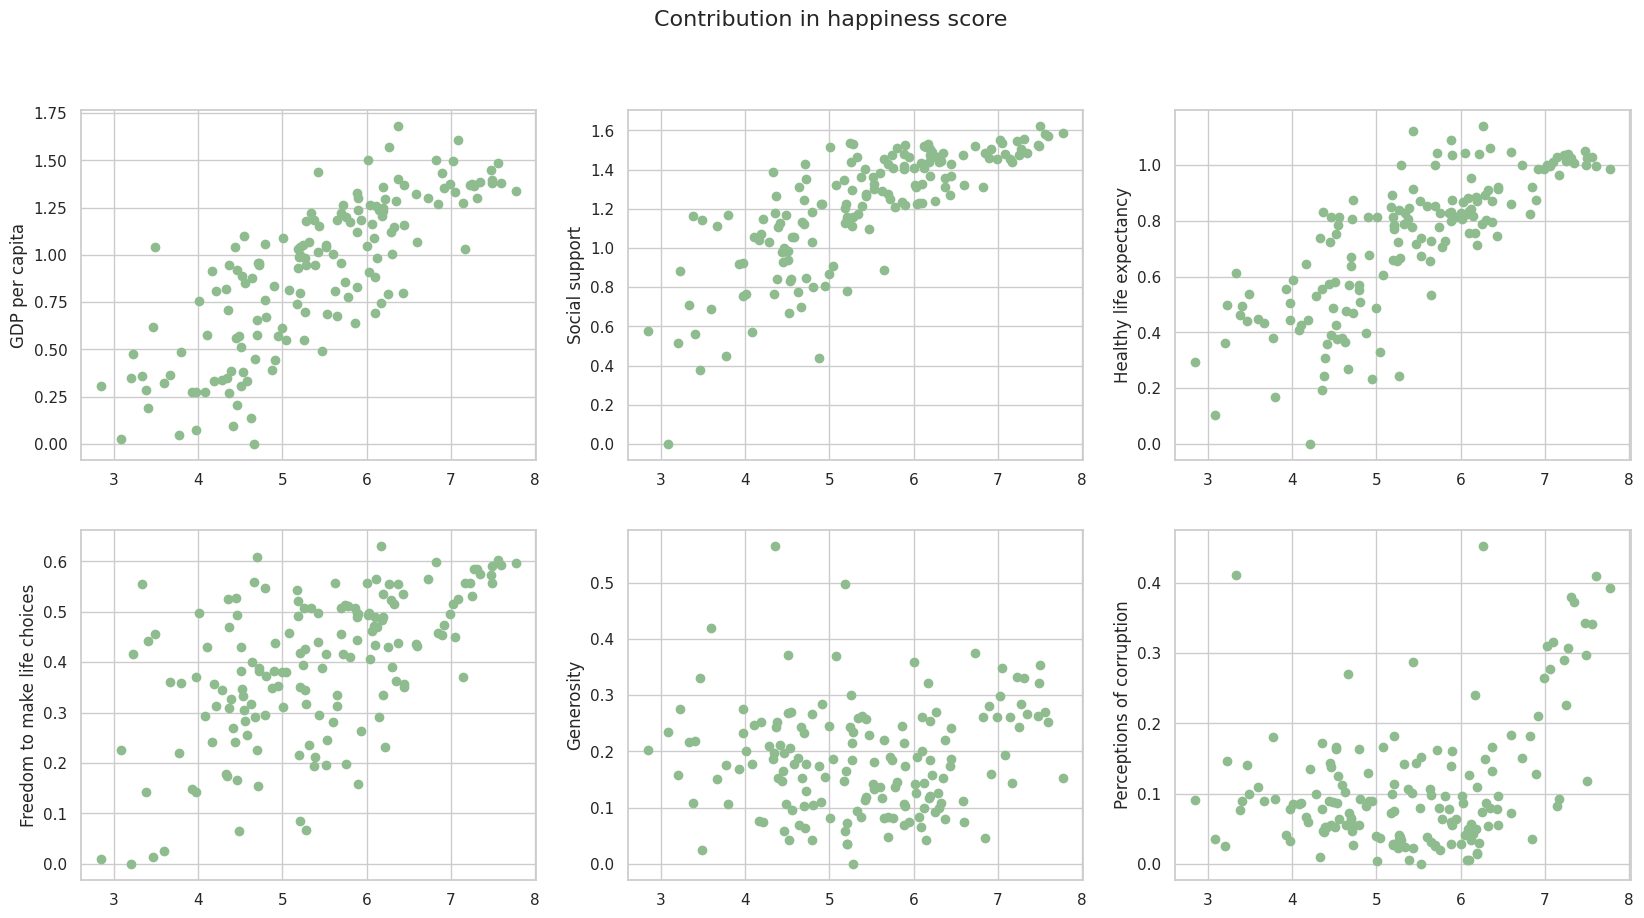

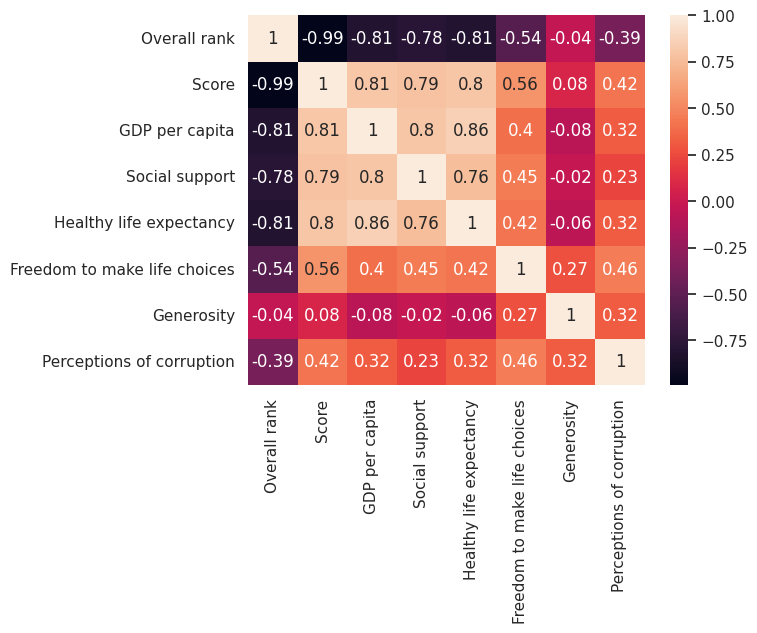

In [147]:
#AUTOR: Christian Raúl Valero Gutiérrez
#TÍTULO: Reto Explorando el índice de felicidad

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.
happiness = pd.read_csv('/content/drive/MyDrive/Cursos/Programación en Python: The Learning Gate/Modulo 4/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
metadata =pd.read_csv('/content/drive/MyDrive/Cursos/Programación en Python: The Learning Gate/Modulo 4/0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv')

#A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)

#Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.
plt.figure()
plt.hist(happiness['Score'], bins=10,color='darkseagreen',alpha=0.5)
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')

props_bbox = {'boxstyle': 'circle', 'facecolor': 'red', 'alpha': 0.3}
value = mexico.loc['Mexico']['Score']

plt.text(value,0,'MEX',bbox=props_bbox)

#Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.
plt.figure()
happiness['Healthy life expectancy'].plot.box(color='g')
plt.title('World Happiness Report')

value2 = mexico.loc['Mexico']['Healthy life expectancy']
plt.annotate('MEX',bbox=props_bbox,xy=(1,value2),xytext=(1.2,value2),arrowprops=dict(arrowstyle='->'))

#Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.
mexico2 = mexico.T
mexico2.drop('Overall rank', inplace=True)
mexico2.drop('Score', inplace=True)
mexico2.columns = ['Factors']
mexico2

mexico2.plot.pie(y='Factors', labels= mexico2.index, autopct='%1.1f%%')
plt.gca().legend_.remove()
plt.table(cellText=mexico2.values,colLabels=mexico2.columns, rowLabels=mexico2.index,cellLoc='center', bbox=[-0.3,0,0.3,0.3])
plt.title('Contribution in Mexico happiness score')
plt.ylabel('')

#Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.
mas_feli = happiness[happiness['Score'] == happiness['Score'].max()]
menos_feli = happiness[happiness['Score'] == happiness['Score'].min()]
tres_paises = happiness[happiness['Country or region'].isin(['Germany','United States','Mexico'])]
paises = pd.concat([mas_feli,menos_feli, tres_paises])
paises.drop('Overall rank', inplace=True, axis=1)
paises.drop('Score', inplace=True, axis=1)



plt.figure()
sns.set_theme(style='whitegrid')
sns.set_palette('pastel')
paises_melted = paises.melt(id_vars='Country or region',
                            value_vars=['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
                            var_name='Factor',
                            value_name='Value')
sns.barplot(data=paises_melted, x='Factor', y='Value', hue='Country or region')
plt.xlabel('')
plt.xticks(rotation = 90)

#Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.
fig = plt.figure(figsize=(20,10))
fig.suptitle('Contribution in happiness score', fontsize=16)

ax1 = fig.add_subplot(231)
ax1.plot(happiness['Score'], happiness['GDP per capita'], 'o', data = happiness, color='darkseagreen')
ax1.set_ylabel('GDP per capita')

ax2 = fig.add_subplot(232)
ax2.plot(happiness['Score'], happiness['Social support'], 'o', data = happiness, color='darkseagreen')
ax2.set_ylabel('Social support')

ax3 = fig.add_subplot(233)
ax3.plot(happiness['Score'], happiness['Healthy life expectancy'], 'o', data = happiness, color='darkseagreen')
ax3.set_ylabel('Healthy life expectancy')

ax4 = fig.add_subplot(234)
ax4.plot(happiness['Score'], happiness['Freedom to make life choices'], 'o', data = happiness, color='darkseagreen')
ax4.set_ylabel('Freedom to make life choices')

ax5 = fig.add_subplot(235)
ax5.plot(happiness['Score'], happiness['Generosity'], 'o', data = happiness, color='darkseagreen')
ax5.set_ylabel('Generosity')

ax6 = fig.add_subplot(236)
ax6.plot(happiness['Score'], happiness['Perceptions of corruption'], 'o', data = happiness, color='darkseagreen')
ax6.set_ylabel('Perceptions of corruption')


#Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.
meta_happiness = happiness.merge(metadata, left_on = 'Country or region', right_on = 'TableName')

plt.figure()
indicators = meta_happiness.reindex(columns=['Overall rank','Score','GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
sns.heatmap(round(indicators.corr(),2),annot=True)
    #Variaron por poco los valores en la gráfica